#### Feature engineering is a crucial step in the machine learning pipeline that involves transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model performance
`steps`
1. Data Collection
2. Data Cleaning
3. Data Exploration (Exploratory Data Analysis - EDA)
4. Feature Creation
5. Feature Transformation
6. Feature Encoding
7. Feature Selection
8. Dimensionality Reduction


### 1.Data Collection
1. Collect data from our previously processed file sources for EDA and feature engineering process.
2. Understand the nature and structure of the data sources through EDA process





In [99]:
import pandas as pd
import numpy as np

In [100]:
df = pd.read_csv('/content/processed_data.csv')

In [101]:
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,2025-01-31 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,2025-01-31 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,2025-01-31 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2025-01-31 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2025-01-31 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


### 2. Data Cleaning
1. Handle Missing Values,fill missing values using methods like mean, median, mode, or more sophisticated techniques like KNN imputation.
2. Deletion: Remove rows or columns with excessive missing values if appropriate.
3. Remove Duplicates: Identify and remove duplicate records to avoid redundancy.
we completed all this process and have processed data for EDA purpose.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15205 entries, 0 to 15204
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         15205 non-null  object 
 1   day_of_week                  15205 non-null  object 
 2   age_band_of_driver           15205 non-null  object 
 3   sex_of_driver                15205 non-null  object 
 4   educational_level            15205 non-null  object 
 5   vehicle_driver_relation      15205 non-null  object 
 6   driving_experience           15205 non-null  object 
 7   type_of_vehicle              15205 non-null  object 
 8   owner_of_vehicle             15205 non-null  object 
 9   service_year_of_vehicle      15205 non-null  object 
 10  defect_of_vehicle            15205 non-null  object 
 11  area_accident_occured        15205 non-null  object 
 12  lanes_or_medians             15205 non-null  object 
 13  road_allignment 

In [103]:
df.describe()

,number_of_vehicles_involved,number_of_casualties
count,15205.00000,15205.000000
mean,2.03295,1.443999
std,0.62011,0.931612
min,1.00000,1.000000
25%,2.00000,1.000000
50%,2.00000,1.000000
75%,2.00000,2.000000
max,7.00000,8.000000


In [104]:
df.isnull().sum()

,0
time,0
day_of_week,0
age_band_of_driver,0
sex_of_driver,0
educational_level,0
vehicle_driver_relation,0
driving_experience,0
type_of_vehicle,0
owner_of_vehicle,0
service_year_of_vehicle,0


In [105]:
df = df.drop_duplicates()

In [106]:
df.duplicated().sum()

0

### 3. Data Exploration (Exploratory Data Analysis - EDA)
1. Descriptive Statistics: Calculate mean, median, mode, standard deviation, etc.
2. Data Visualization: Use plots (histograms, box plots, scatter plots) to understand data distributions and relationships.



In [107]:
df.describe(include=['O'])

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
count,14736,14736,14736,14736,14736,14736,14736,14736,14736,14736,...,14736,14736,14736,14736,14736,14736,14736,14736,14736,14736
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,4,6,4,7,5,9,20,3
top,2025-01-31 15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,140,2440,5488,13702,9991,12219,4931,4820,13100,6811,...,10074,6848,6168,5485,9365,10650,14649,13658,2740,12482


In [108]:
df['day_of_week'].value_counts()

,count
day_of_week,
Friday,2440
Thursday,2223
Wednesday,2170
Tuesday,2106
Saturday,2050
Monday,1992
Sunday,1755


In [109]:
df['cause_of_accident'].value_counts()

,count
cause_of_accident,
No distancing,2740
Changing lane to the right,2170
Changing lane to the left,1720
Driving carelessly,1678
No priority to vehicle,1442
Moving Backward,1364
No priority to pedestrian,853
Other,539
Overtaking,511


In [110]:
df.groupby('accident_severity').size()

,0
accident_severity,
Fatal injury,186
Serious Injury,2068
Slight Injury,12482


In [111]:
df['number_of_casualties'].mean()

1.458129750271444

In [112]:
df['area_accident_occured'].value_counts()

,count
area_accident_occured,
Other,4858
Office areas,4018
Residential areas,2495
Church areas,1330
Industrial areas,552
School areas,504
Recreational areas,327
Outside rural areas,265
Hospital areas,144


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, norm
import statsmodels.api as sm

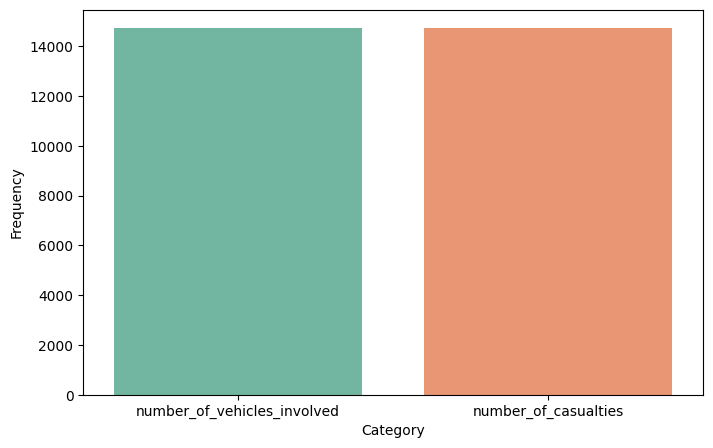

In [114]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, palette='Set2')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

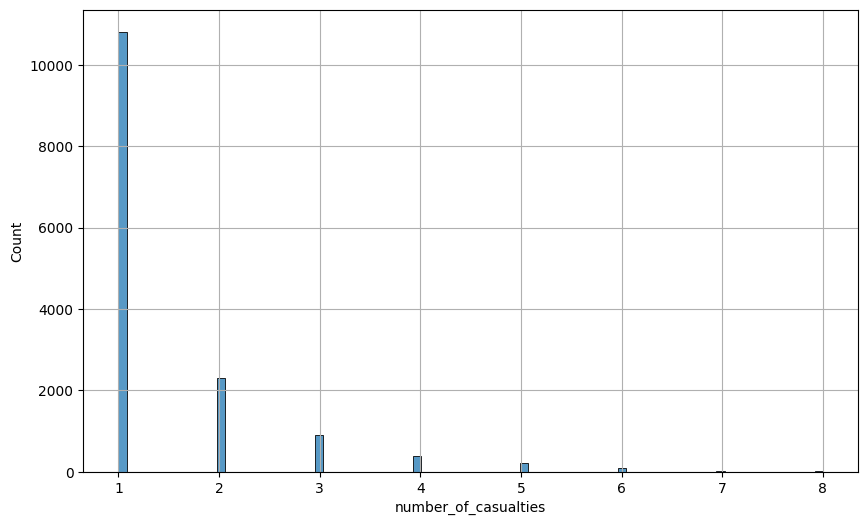

In [115]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='number_of_casualties')
plt.grid()
plt.show()

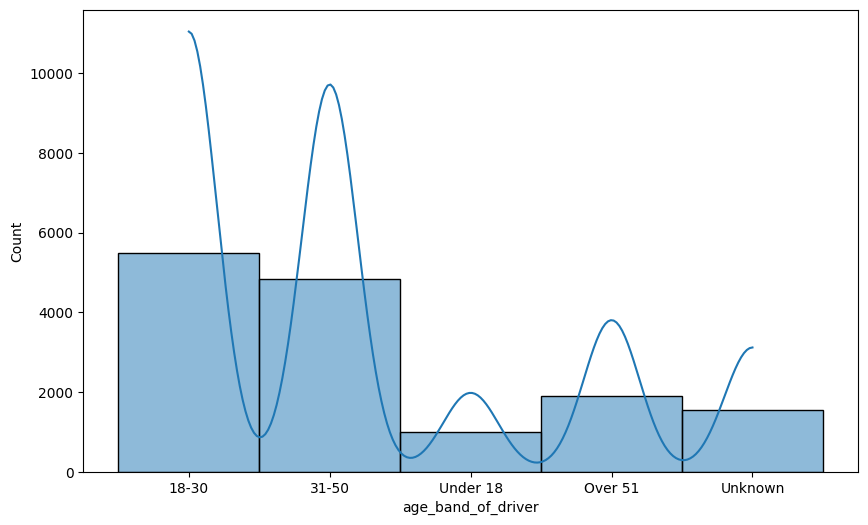

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(df['age_band_of_driver'],kde=True)
plt.show()

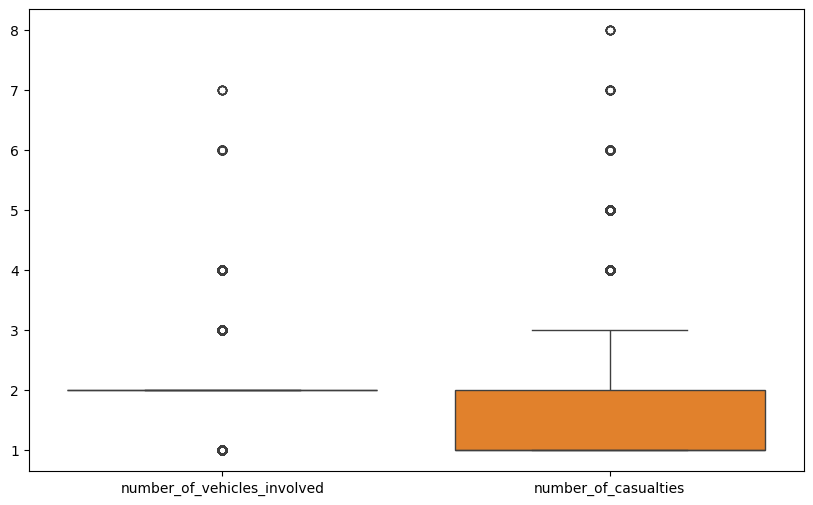

In [117]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.show()

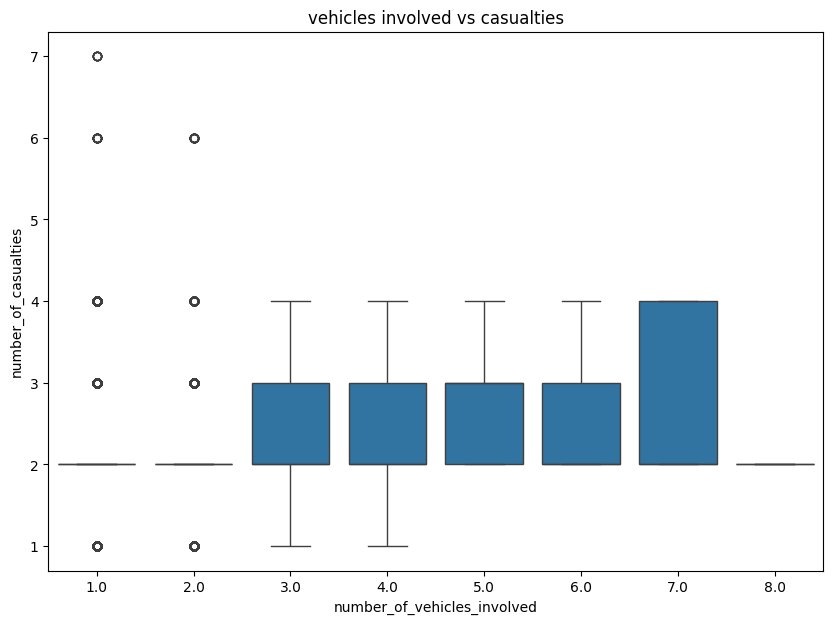

In [118]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='number_of_vehicles_involved', x='number_of_casualties')
plt.xlabel('number_of_vehicles_involved')
plt.ylabel('number_of_casualties')
plt.title('vehicles involved vs casualties')
plt.show()

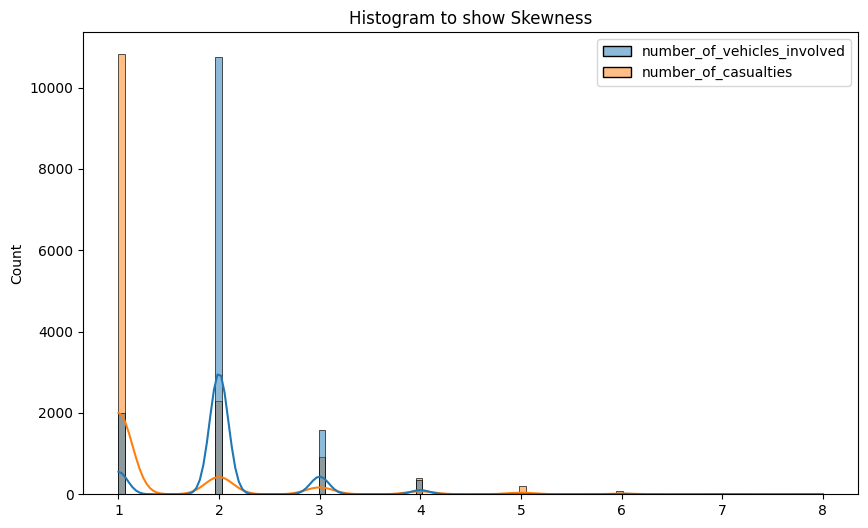

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(df, kde=True)
plt.title("Histogram to show Skewness")
plt.show()

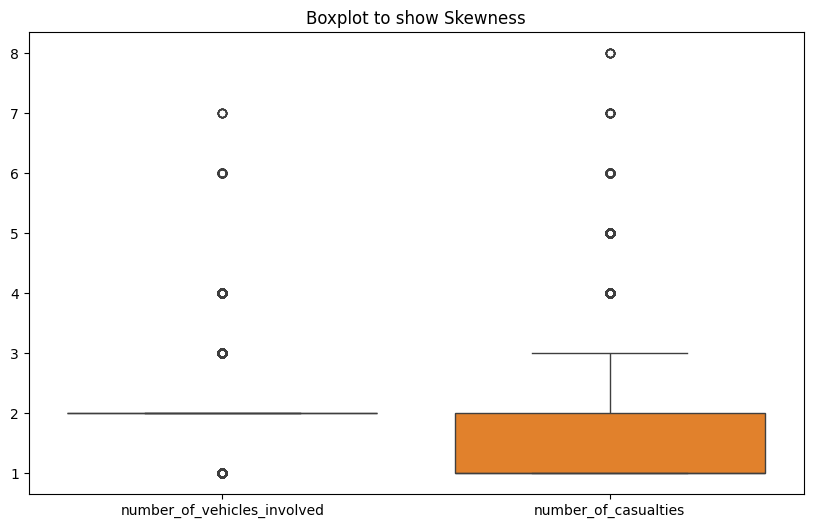

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.title("Boxplot to show Skewness")
plt.show()

In [121]:
for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        print(f"Could not convert column '{column}' to numeric. It may contain non-numeric values.")

# Now calculate the kurtosis
data_kurtosis = kurtosis(df.select_dtypes(include=np.number)) # Only include numeric columns
print(f"Kurtosis: {data_kurtosis}")

Could not convert column 'time' to numeric. It may contain non-numeric values.
Could not convert column 'day_of_week' to numeric. It may contain non-numeric values.
Could not convert column 'age_band_of_driver' to numeric. It may contain non-numeric values.
Could not convert column 'sex_of_driver' to numeric. It may contain non-numeric values.
Could not convert column 'educational_level' to numeric. It may contain non-numeric values.
Could not convert column 'vehicle_driver_relation' to numeric. It may contain non-numeric values.
Could not convert column 'driving_experience' to numeric. It may contain non-numeric values.
Could not convert column 'type_of_vehicle' to numeric. It may contain non-numeric values.
Could not convert column 'owner_of_vehicle' to numeric. It may contain non-numeric values.
Could not convert column 'service_year_of_vehicle' to numeric. It may contain non-numeric values.
Could not convert column 'defect_of_vehicle' to numeric. It may contain non-numeric values.


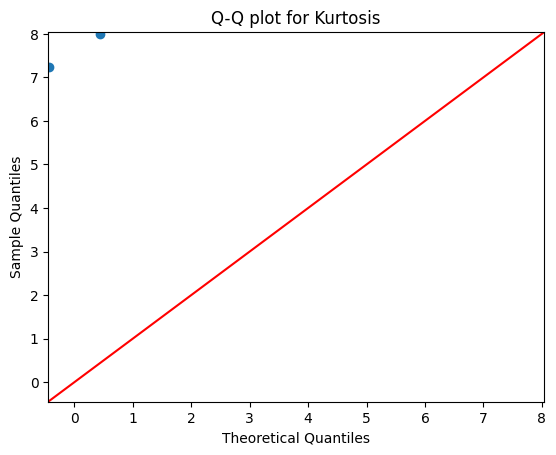

In [122]:
sm.qqplot(data_kurtosis, line='45')
plt.title("Q-Q plot for Kurtosis")
plt.show()


In [123]:
frequency_table = df.columns.value_counts().reset_index()
frequency_table.columns = ['Category', 'Frequency']
print(frequency_table)

                       Category  Frequency
0                          time          1
1                   day_of_week          1
2             cause_of_accident          1
3           pedestrian_movement          1
4          fitness_of_casuality          1
5             work_of_casuality          1
6             casualty_severity          1
7          age_band_of_casualty          1
8               sex_of_casualty          1
9                casualty_class          1
10             vehicle_movement          1
11         number_of_casualties          1
12  number_of_vehicles_involved          1
13            type_of_collision          1
14           weather_conditions          1
15             light_conditions          1
16      road_surface_conditions          1
17            road_surface_type          1
18            types_of_junction          1
19              road_allignment          1
20             lanes_or_medians          1
21        area_accident_occured          1
22         

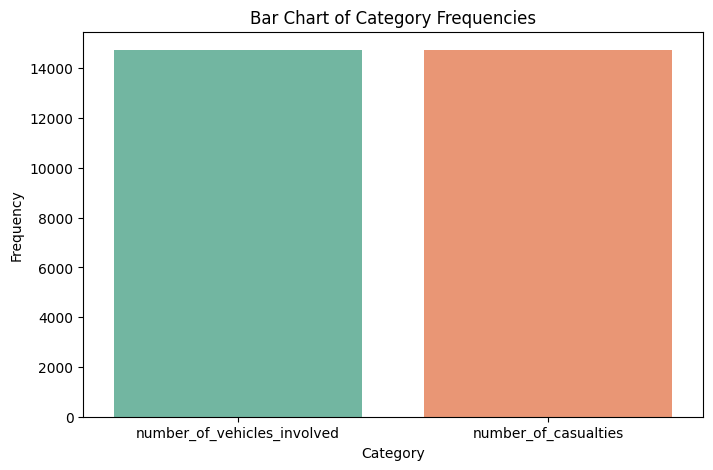

In [124]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, palette='Set2')
plt.title('Bar Chart of Category Frequencies')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

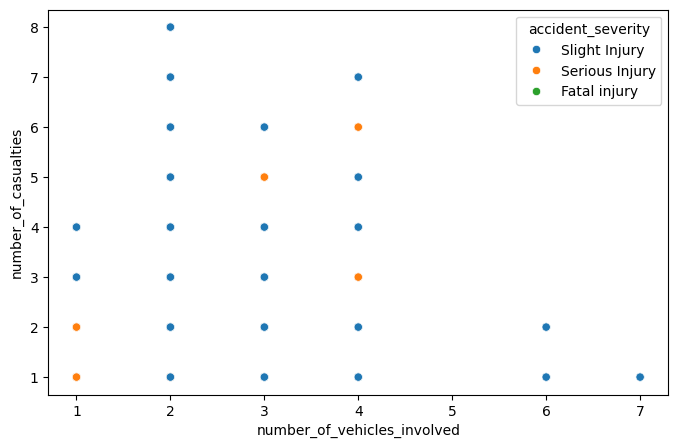

In [125]:
plt.figure(figsize=(8, 5))
sns.scatterplot(df,x='number_of_vehicles_involved',y='number_of_casualties', hue='accident_severity')
plt.xlabel('number_of_vehicles_involved')
plt.ylabel('number_of_casualties')
plt.show()


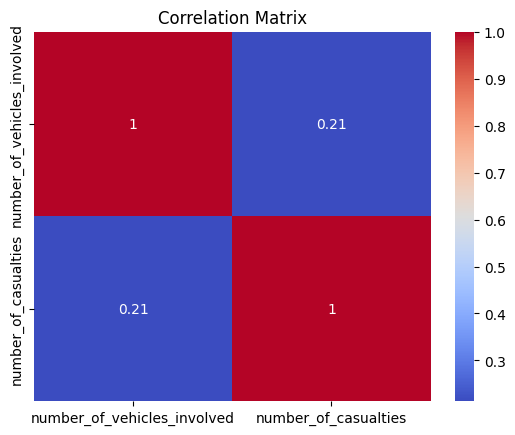

In [126]:
correlation_matrix = df[['number_of_vehicles_involved','number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-127-1004fe506d82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='number_of_vehicles_involved', y='number_of_casualties', data=df, palette='Set2')


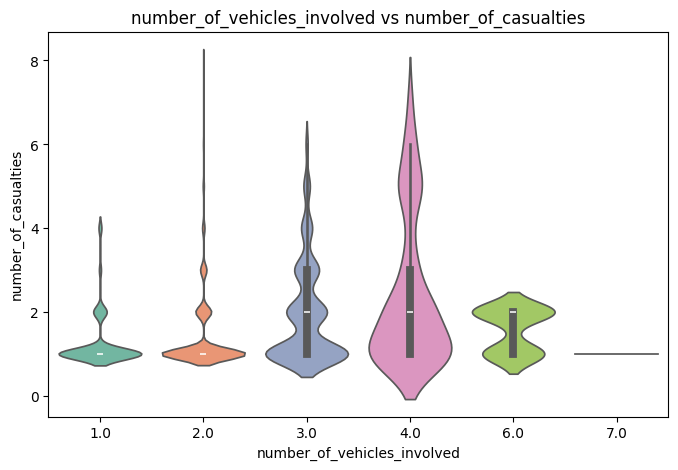

In [127]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='number_of_vehicles_involved', y='number_of_casualties', data=df, palette='Set2')
plt.title('number_of_vehicles_involved vs number_of_casualties')
plt.xlabel('number_of_vehicles_involved')
plt.ylabel('number_of_casualties')
plt.show()

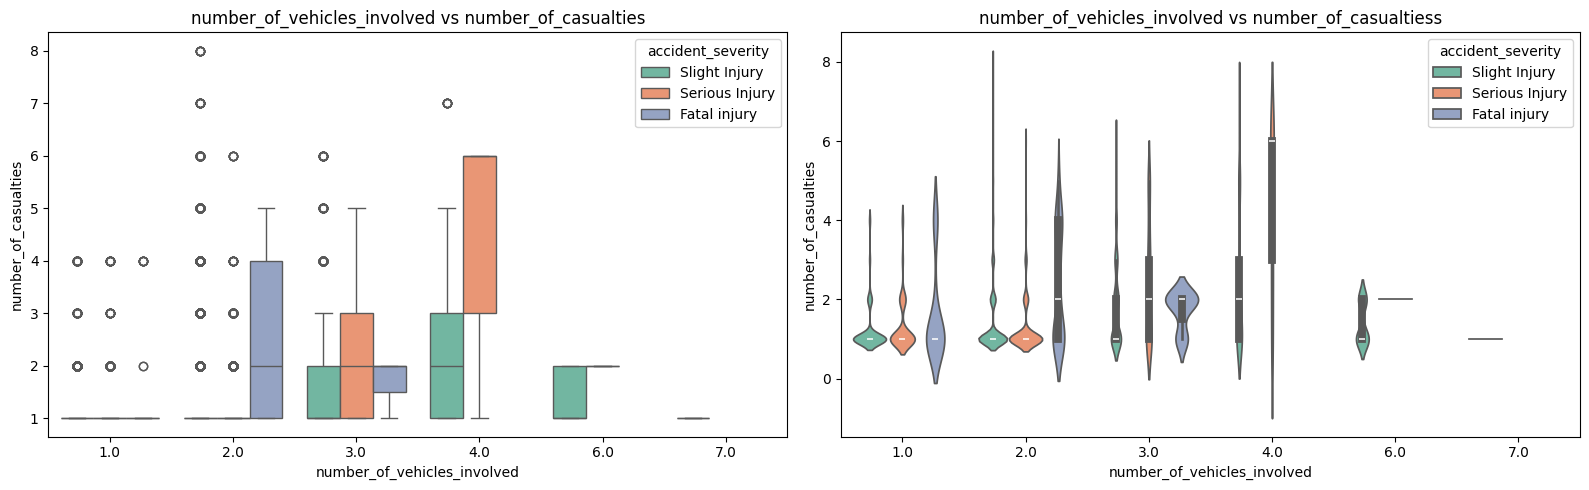

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))

# Box Plot on the left
sns.boxplot(x='number_of_vehicles_involved', y='number_of_casualties', data=df, palette='Set2',hue = 'accident_severity', ax=axes[0])
axes[0].set_title('number_of_vehicles_involved vs number_of_casualties')
axes[0].set_xlabel('number_of_vehicles_involved')
axes[0].set_ylabel('number_of_casualties')

# Violin Plot on the right
sns.violinplot(x='number_of_vehicles_involved', y='number_of_casualties', data=df,hue='accident_severity', palette='Set2', ax=axes[1])
axes[1].set_title('number_of_vehicles_involved vs number_of_casualtiess')
axes[1].set_xlabel('number_of_vehicles_involved')
axes[1].set_ylabel('number_of_casualties')

plt.tight_layout()
plt.show()


In [129]:
cross_tab = pd.crosstab(df['number_of_vehicles_involved'], df['number_of_casualties'])
cross_tab

number_of_casualties,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
number_of_vehicles_involved,,,,,,,,
1.0,1635,266,39,56,0,0,0,0
2.0,8223,1530,610,225,101,49,14,8
3.0,774,380,232,103,60,19,0,0
4.0,160,90,28,10,46,21,8,0
6.0,18,24,0,0,0,0,0,0
7.0,7,0,0,0,0,0,0,0


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


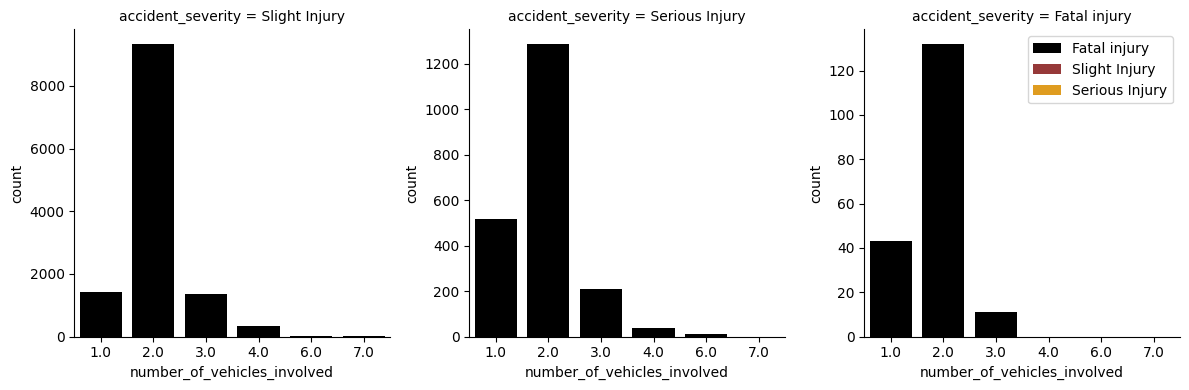

In [130]:
grid = sns.FacetGrid(data=df, col='accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'number_of_vehicles_involved', data=df, hue='accident_severity', palette=['black', 'brown', 'orange']) # Added data=df
plt.legend()
plt.show()


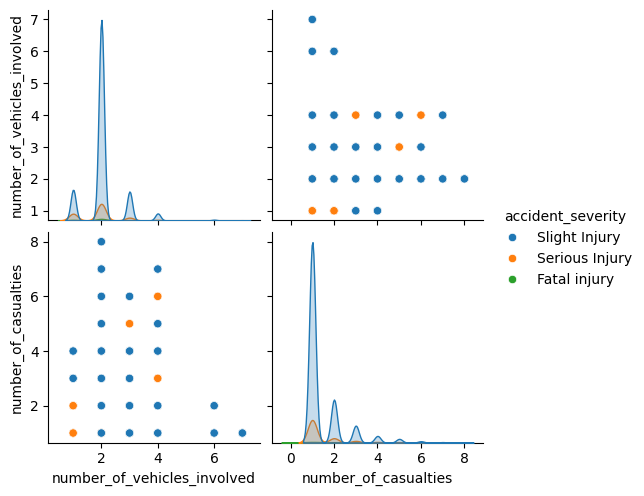

In [131]:
sns.pairplot(df, hue='accident_severity')
plt.show()

Class 0: 12482
Class 1: 2068
Proportion: 6.04 : 1


<ipython-input-132-3d04cd8bf3fb>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 0:', target_count[0])
<ipython-input-132-3d04cd8bf3fb>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 1:', target_count[1])
<ipython-input-132-3d04cd8bf3fb>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')


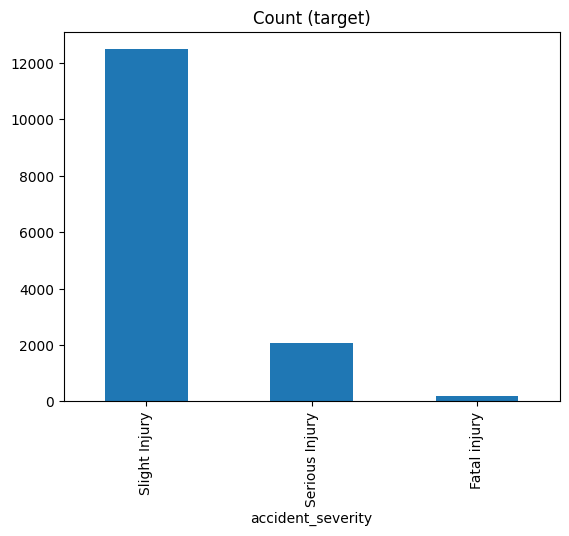

In [132]:
target_count = df['accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')
plt.show();

In [133]:
# dropping unnecessary columns
lists=['vehicle_driver_relation', 'work_of_casuality', 'fitness_of_casuality','day_of_week','casualty_severity','time','sex_of_driver','educational_level','defect_of_vehicle','owner_of_vehicle','service_year_of_vehicle', 'road_surface_type','sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [134]:
df['weather_conditions'].value_counts()

,count
weather_conditions,
Normal,12025
Raining,1612
Other,363
Unknown,347
Cloudy,142
Windy,118
Snow,74
Raining and Windy,45
Fog or mist,10


In [135]:
df.head()

,age_band_of_driver,driving_experience,type_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,age_band_of_casualty,pedestrian_movement,cause_of_accident,accident_severity
0,18-30,1-2yr,Automobile,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2.0,2.0,Going straight,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,1-2yr,Lorry (41?100Q),Recreational areas,other,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Collision with roadside objects,2.0,2.0,Going straight,Driver or rider,31-50,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,5-10yr,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,Pedestrian,18-30,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,2-5yr,Automobile,Industrial areas,other,Tangent road with flat terrain,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,na,na,Not a Pedestrian,Overtaking,Slight Injury


### 5.Feature Encoding
1.Categorical Encoding:
* One-Hot Encoding: Convert categorical  variables into binary vectors.
* Label Encoding: Convert categorical variables into numeric labels.
* Ordinal Encoding: Convert ordinal categorical variables into numeric values preserving the order.
* Target Encoding: Encode categorical variables based on the target variable.
2. Frequency Encoding: Replace categories with their frequency counts.
3. Binary Encoding: Convert categories into binary digits.



In [136]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a ColumnTransformer for LabelEncoding to categorical features and StandardScaler to numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist() #  categorical features
# Ensure 'time' and other removed features are not in categorical_features
categorical_features = [f for f in categorical_features if f in X_train.columns]
numeric_features = [col for col in df.columns if col not in categorical_features and col != 'accident_severity']

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Replace LabelEncoder with OneHotEncoder
])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Apply StandardScaler to numerical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to your data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

### 6.Feature Selection
1. Filter Methods:
* Correlation Analysis: Select features based on their correlation with the target variable.
* Chi-Square Test: Use for categorical target variables.
* Variance Threshold: Remove features with low variance.
2. Wrapper Methods:
* Recursive Feature Elimination (RFE): Recursively remove the least important features.
* Forward/Backward Selection: Add/remove features based on model performance.

In [146]:
from sklearn.cluster import KMeans

X = df[['area_accident_occured','number_of_casualties']]
encoder = OneHotEncoder()
x_scaled = encoder.fit_transform(X)

inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)

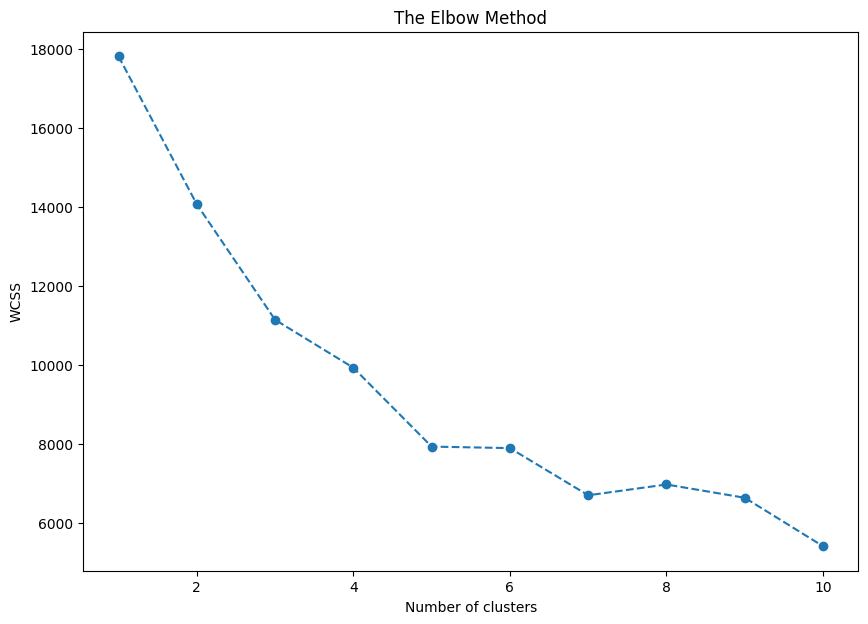

In [147]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11), inertia, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [149]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x_scaled)
df['cluster'] = y_kmeans


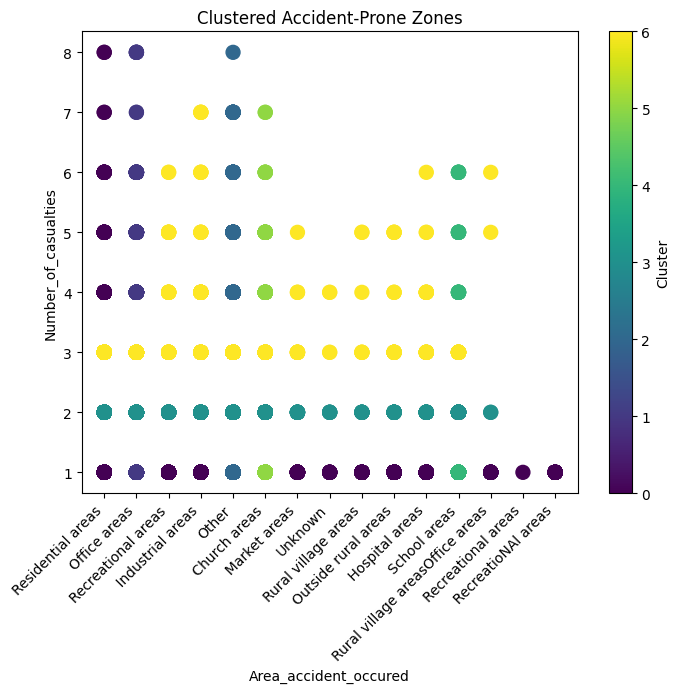

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(df['area_accident_occured'],df['number_of_casualties'], c=df['cluster'], cmap='viridis', s=100)
plt.title('Clustered Accident-Prone Zones')
plt.xlabel('Area_accident_occured')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number_of_casualties')
plt.colorbar(label='Cluster')
plt.show()